# C-MAPP Turbofan exploring dataset

In [1]:
# IMPORTING
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import Image

In [2]:
df = pd.read_csv('cmapss/train_FD003.txt', 
                 names=['unit number', 'time, in cycles'] + 
                 [f'operational setting {i}' for i in range(1, 4)] + \
                 [f'sensor measurement {i}' for i in range(1, 22)], index_col=0, delimiter=r"\s+")

In [3]:
df.describe()

,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
count,24720.000000,24720.000000,24720.000000,24720.0,2.472000e+04,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,...,24720.000000,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000
mean,139.077063,-0.000024,0.000005,100.0,5.186700e+02,642.457858,1588.079175,1404.471212,1.462000e+01,21.595841,...,523.050873,2388.071643,8144.202916,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024
std,98.846675,0.002194,0.000294,0.0,6.684921e-11,0.523031,6.810418,9.773178,3.602525e-12,0.018116,...,3.255314,0.158121,16.504118,0.060512,1.750371e-14,1.761459,0.0,0.0,0.248865,0.149234
min,1.000000,-0.008600,-0.000600,100.0,5.186700e+02,640.840000,1564.300000,1377.060000,1.462000e+01,21.450000,...,517.770000,2386.930000,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600
25%,62.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.080000,1583.280000,1397.187500,1.462000e+01,21.580000,...,521.150000,2388.010000,8134.510000,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200
50%,124.000000,0.000000,-0.000000,100.0,5.186700e+02,642.400000,1587.520000,1402.910000,1.462000e+01,21.600000,...,521.980000,2388.070000,8141.200000,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600
75%,191.000000,0.001500,0.000300,100.0,5.186700e+02,642.790000,1592.412500,1410.600000,1.462000e+01,21.610000,...,523.840000,2388.140000,8149.230000,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300
max,525.000000,0.008600,0.000700,100.0,5.186700e+02,645.110000,1615.390000,1441.160000,1.462000e+01,21.610000,...,537.400000,2388.610000,8290.550000,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24720 entries, 1 to 100
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time, in cycles        24720 non-null  int64  
 1   operational setting 1  24720 non-null  float64
 2   operational setting 2  24720 non-null  float64
 3   operational setting 3  24720 non-null  float64
 4   sensor measurement 1   24720 non-null  float64
 5   sensor measurement 2   24720 non-null  float64
 6   sensor measurement 3   24720 non-null  float64
 7   sensor measurement 4   24720 non-null  float64
 8   sensor measurement 5   24720 non-null  float64
 9   sensor measurement 6   24720 non-null  float64
 10  sensor measurement 7   24720 non-null  float64
 11  sensor measurement 8   24720 non-null  float64
 12  sensor measurement 9   24720 non-null  float64
 13  sensor measurement 10  24720 non-null  float64
 14  sensor measurement 11  24720 non-null  float64
 15  sens

In [6]:
df

,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
unit number,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,21.61,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,21.61,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,21.61,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,21.61,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,21.61,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,21.61,...,519.66,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631
100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,21.61,...,519.91,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746
100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,21.61,...,519.44,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682


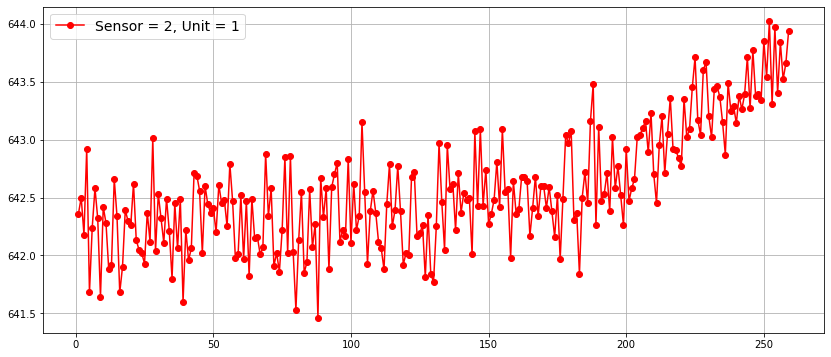

In [8]:
df2 = df.copy()

def plot_sensor(unit_number, sensor_number):
    plt.subplots(figsize=(14, 6))
    
    plt.plot(df2.loc[unit_number, 'time, in cycles'],
            df2.loc[unit_number, f'sensor measurement {sensor_number}'], 'ro-', label=f'Sensor = {sensor_number}, Unit = {unit_number}')
    plt.legend(loc='best', fontsize=14)
    plt.grid()
    

plot_sensor(unit_number = 1,sensor_number = 2)


In [ ]:
#TODO BISOGNA LEGGERE IL PAPER
#TODO CI SONO DELLE COLONNE COSTANTI. BISOGNA ELIMINARLE PERCHÉ NON AGGIUNGONO ALCUNA INFORMAZIONE.